## This notebook may be used to reproduce Figure A1 in Appendix A

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

<IPython.core.display.Javascript object>


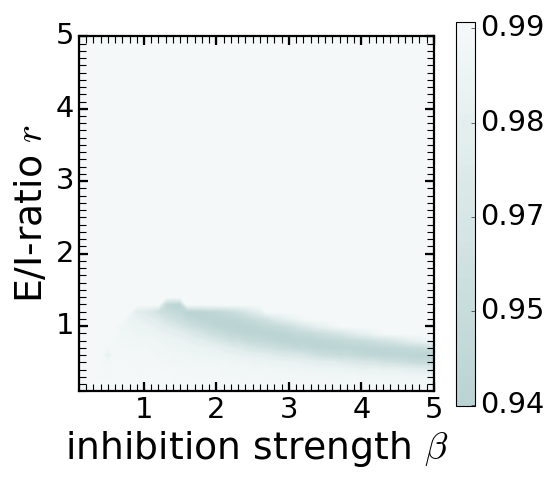

In [10]:
# define grid -> grid for contourplot
r_data = []
beta_data = []
Ep_data = []


#Comment and uncomment the following lines as appropriate

## Fig Suppl Mat S7A
#fname='PenaltyData_PooledInh_v5_tau4_New2018_rs.txt' 
#Pen_init = 2*5**2

## Fig Appendix A1B
#fname='PenaltyData_PooledInh_v7p5_tau4_New2018_rs.txt'
#Pen_init = 2*7.5**2

## Fig Suppl Mat S7C
#fname='PenaltyData_PooledInh_v10_tau4_New2018_rs.txt'
#Pen_init = 2*10**2

## Fig Appendix A1A
#fname='PenaltyData_PooledInh_v7p5_tau2_New2018_rs.txt'
#Pen_init = 2*7.5**2

## Fig Appendix A1C
#fname='PenaltyData_PooledInh_v7p5_tau8_New2018_rs.txt'
#Pen_init = 2*7.5**2

## Fig Appendix A1D
#fname='PenaltyData_PooledInh_v7p5_tau16_New2018_rs.txt'
#Pen_init = 2*7.5**2

## Fig Appendix A1E
fname='PenaltyData_PooledInh_v7p5_tau32_New2018_rs.txt'
Pen_init = 2*7.5**2

with open('./DataGeneration/DataFiles/'+fname, 'r') as infile:
    infile.readline
    for line in infile:
        if not line.startswith('#'):
            r_data.append(float(line.split()[0]))
            beta_data.append(float(line.split()[1]))
            Ep_data.append(float(line.split()[2]))

xi_val = np.linspace(min(beta_data),max(beta_data),50) 
yi_val = np.linspace(min(r_data),max(r_data),50) 

# grid the data.
zi_val =  griddata( (beta_data, r_data), Ep_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 

fig = plt.figure(figsize=(7,6))
#ax = plt.axes()
ax = fig.add_subplot(111)
#CS = plt.contourf(xi_val,yi_val,zi_val/np.max(zi_val),50,cmap=plt.cm.bone)
norm = mpl.colors.Normalize(vmin=0.7, vmax=1)
CS = ax.contourf(xi_val,yi_val,zi_val/Pen_init,50,cmap=plt.cm.bone,norm=norm)
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0)
cbar.ax.tick_params(labelsize=26) 
#cbar.set_label('expected penalty', fontsize=28, labelpad=-70)

#lowlim = np.min(zi_val)/np.max(zi_val);
lowlim = float(np.min(zi_val)/Pen_init)
uplim = float(np.max(zi_val)/Pen_init)
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#cbar.set_ticks([lowlim,mid2,uplim])
#cbar.set_ticklabels([round(lowlim, 2), round(mid2, 2), round(uplim, 2)])
#plt.title(r'expected penalty',fontsize=22)
plt.xlabel(r'inhibition strength $\beta$', fontsize=34)
plt.ylabel(r'E/I-ratio $r$', fontsize=34)

plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=26)
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=26)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=6, width=1, which='minor')

#plt.plot([3,3],[0.1,5],'orange',lw=4, ls='--')
#plt.plot([0.1,5],[1,1],'orange',lw=4, ls='--')
#plt.plot([3,3], [1,2], 'or', markersize=12, markeredgecolor='k')

#plt.tick_params(labelsize=14)
#plt.show()
ax.set_aspect('equal')
plt.tight_layout();

In [11]:
#fig.savefig("FigA1A_Appendix.pdf")
#fig.savefig("FigA1B_Appendix.pdf")
#fig.savefig("FigA1C_Appendix.pdf")
#fig.savefig("FigA1D_Appendix.pdf")
#fig.savefig("FigA1E_Appendix.pdf")

<IPython.core.display.Javascript object>


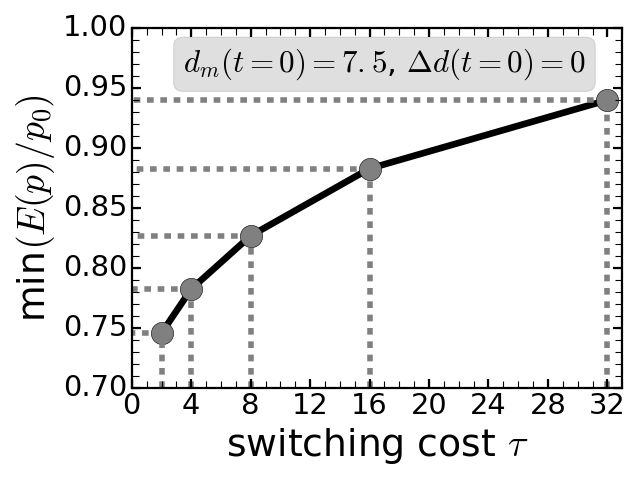

[ 0.74555556  0.78229333  0.82682667  0.88292444  0.94014222]


In [20]:
#This cell reproduces Fig A1F

fig2 = plt.figure(figsize=(8,6))
#ax = plt.axes()
ax = fig2.add_subplot(111)

tau = [2, 4, 8, 16, 32]
PenMinTau = np.array([83.875, 88.008, 93.018, 99.329, 105.766])/112.5
plt.plot(tau, PenMinTau, '-o', markersize=20, c='k', lw=6, markerfacecolor='0.5', markeredgecolor='k')
print(PenMinTau)
for kk in range(len(tau)):
    plt.plot([tau[kk],tau[kk]], [0.7, PenMinTau[kk]], '--', c='0.5', lw=5 )
    plt.plot([tau[kk],0], [PenMinTau[kk], PenMinTau[kk]], '--', c='0.5', lw=5 )

plt.xlabel(r'switching cost $\tau$', fontsize=34)
plt.ylabel(r'min$\left(E(p)/p_0\right)$', fontsize=34)

plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=26)
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=26)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=6, width=1, which='minor')

plt.xlim(0,33)
plt.ylim(0.7,1)

bbox_props = dict(boxstyle="round", fc="grey", ec="0.5", alpha=0.25)
ax.text(17, 0.97, r"$d_m(t=0)=7.5$, $\Delta d(t=0)=0$", ha="center", va="center", size=28,
        bbox=bbox_props)

#ax.set_aspect('equal')
plt.tight_layout();

In [21]:
#fig2.savefig("FigA1F_Appendix.pdf")

<IPython.core.display.Javascript object>


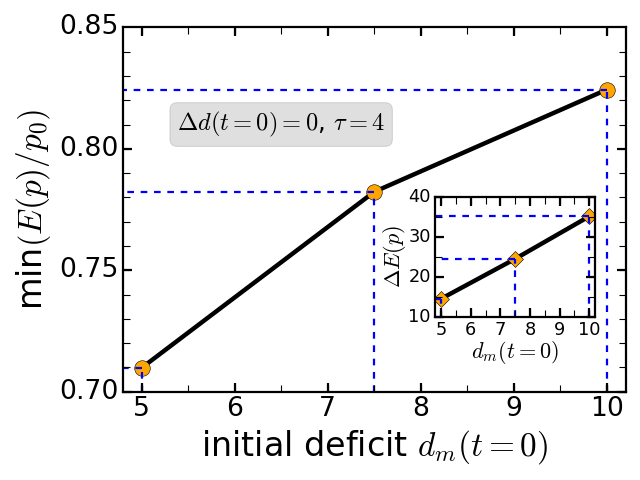

[ 0.70978     0.78229333  0.824425  ]


In [5]:
#This cell reproduces Fig S7(d)

fig3 = plt.figure(figsize=(8,6))
ax = plt.axes()
#ax = fig3.add_subplot(111)

deficit = [5, 7.5, 10]
Def = np.array([35.489, 88.008, 164.885])
DefInit = np.array([2*deficit[0]**2,2*deficit[1]**2,2*deficit[2]**2])
PenMinDef = Def/DefInit
PenMinDef_abs = (DefInit-Def) #/DefInit
PenMinDef_rel = (DefInit-Def)/DefInit
plt.plot(deficit, PenMinDef, '-o', markersize=14, c='k', lw=4, markerfacecolor='orange', markeredgecolor='k')
#plt.plot(deficit, PenMinDef_rel, '-D', markersize=14, c='red', lw=4, markerfacecolor='green', markeredgecolor='k')
print(PenMinDef)
for kk in range(len(deficit)):
    plt.plot([deficit[kk],deficit[kk]], [0.7, PenMinDef[kk]], '--', c='b', lw=2 )
    plt.plot([deficit[kk],0], [PenMinDef[kk], PenMinDef[kk]], '--', c='b', lw=2 )
plt.xlabel(r'initial deficit $d_m(t=0)$', fontsize=30)
plt.ylabel(r'min$\left(E(p)/p_0\right)$', fontsize=30)

plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=24)
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=24)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=6, width=1, which='minor')

plt.xlim(4.8,10.2)
plt.ylim(0.7,0.85)

bbox_props = dict(boxstyle="round", fc="grey", ec="0.5", alpha=0.25)
ax.text(6.5, 0.81, r"$\Delta d(t=0)=0$, $\tau=4$", ha="center", va="center", size=22,
        bbox=bbox_props)

plt.tight_layout();
#fig.set_tight_layout(True);

a = plt.axes([.68, .34, .25, .25])
plt.plot(deficit, PenMinDef_abs, '-D', markersize=10, c='k', lw=4, markerfacecolor='orange', markeredgecolor='k')

for kk in range(len(deficit)):
    plt.plot([deficit[kk],deficit[kk]], [10, PenMinDef_abs[kk]], '--', c='b', lw=2 )
    plt.plot([deficit[kk],4.8], [PenMinDef_abs[kk], PenMinDef_abs[kk]], '--', c='b', lw=2 )
plt.xlabel(r'$d_m(t=0)$', fontsize=20, labelpad=0)
plt.ylabel(r'$\Delta E(p)$', fontsize=20, labelpad=0)

plt.setp( a.xaxis.get_majorticklabels(), rotation=0, fontsize=16)
plt.setp( a.yaxis.get_majorticklabels(), rotation=0, fontsize=16)

a.xaxis.set_major_locator(ticker.MultipleLocator(1))
a.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
a.yaxis.set_major_locator(ticker.MultipleLocator(10))
a.yaxis.set_minor_locator(ticker.MultipleLocator(5))
for axis in ['top','bottom','left','right']:
    a.spines[axis].set_linewidth(2)
a.tick_params('both', length=8, width=2, which='major')
a.tick_params('both', length=6, width=1, which='minor')

plt.xlim(4.8,10.2)
plt.ylim(10,40)

#plt.tight_layout();
fig.set_tight_layout(True)